<a href="https://colab.research.google.com/github/puneet-panwar/All_about_LSTMs/blob/main/roll_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/puneet-panwar/All_about_LSTMs

Cloning into 'All_about_LSTMs'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%pwd
%ls
%cd All_about_LSTMs

All_about_LSTMs/  sample_data/
/content/All_about_LSTMs


In [13]:
## reading data

df = pd.read_csv('data/roll_02_05_2022_new.txt', delimiter=r"\s+") # df--> data frame
#df = pd.read_csv('data/roll_02_05_2022.txt') # df--> data frame
df.shape
result = df.head(10)
print("First 10 rows of the DataFrame:")
print(result)
df.shape
#reader = csv.reader(open("data/roll_02_05_2022.txt"), delimiter="\t") # '\t' for tab and '\s' for space delimited files

## Motor parameters:
torque_const = 3.9 # Nm/A_rms
# motor has incremental encoder with a resolution of 4320000 counts/rev --> 360 deg  = 4320000 counts
c2d = 360/4320000 # counts to degs conversion factor

First 10 rows of the DataFrame:
   Time(Sec)  X_ref_pos(i)  X_enc_pos(i)  X_pos_err(i)  X_vel_ff(f)  \
0    0.00000        120000        120001            -1          0.0   
1    0.00625        120000        120001            -1          0.0   
2    0.01250        120000        120001            -1          0.0   
3    0.01875        120000        120002            -2          0.0   
4    0.02500        120000        120001            -1          0.0   
5    0.03125        120000        120001            -1          0.0   
6    0.03750        120000        120001            -1          0.0   
7    0.04375        120000        120002            -2          0.0   
8    0.05000        120000        120001            -1          0.0   
9    0.05625        120000        120001            -1          0.0   

   X_vel_fbf(f)  X_ref_acc(f)  X_command(f)  X_curr_abs(f)  
0     -841.4660           0.0       5.44362       0.032742  
1     -380.1570           0.0       5.38166       0.048310  
2  

In [15]:
## assign variables:

N, variables = df.shape #N = number of samples
time = df.iloc[:,0]
ref_pos = c2d*df.iloc[:,1] #in deg
feedback_pos = c2d*df.iloc[:,2] # encoder feedback in deg
err_pos = c2d*df.iloc[:,3]
ref_vel = c2d*df.iloc[:,4] #in deg/s
feedback_vel = c2d*df.iloc[:,5] #in deg/s
ref_acc = c2d*df.iloc[:,6] # deg/s^2
command_current = df.iloc[:, 7] #command current in A
actual_current = df.iloc[:,8]  #actual current in A

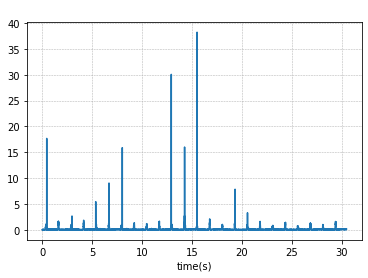

In [21]:
## plotting

plt.plot(time, actual_current)
#plt.axis([20, 90, 150, 175])
plt.title(" ")
plt.xlabel('time(s)')
plt.ylabel('')
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig('CTR_variation.png', dpi=300) # use before plt.show()

In [8]:
max(command_current)

308.314

In [9]:
max(actual_current)

38.2125

In [10]:
max(ref_pos)

120000

In [12]:
360*(120000/4320000)

10.0

In [14]:
c2d


8.333333333333333e-05